# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

<div style="background-color:powderblue;">
Dado que soy nuevo en la inmobiliaria, lo primero que haría sería reunirme con los tasadores y aprovechar todo su conocimiento y experiencia en la valuación de propiedades. 

    
</br>Asumiendo que ya posee el conocimiento del negocio, y teniendo en cuenta el problema que debemos resolver **"Valuar propiedades"**, acordamos que los principales factores que influyen en una valuación son:
<ul>
  <li><b>Ubicación:</b> La ubicación en la que se encuentra la ubicación es un factor determinante en su valuación</li>
    <li><b>Superficie total de la propiedad:</b> La superficie del terreno, ya sea cubierta o no</li>
    <li><b>Superficie cubierta:</b> Superficie cubierta, en m2 que ocupa la construcción</li>
    <li><b>Nro de habitaciones:</b> Cantidad de habitaciones</li>    
    <li><b>Nro de baños:</b> Cantidad de baños</li>      
    <li><b>Nro. de cocheras:</b> Si posee o no cocheras y su capacidad (uno, dos vehículos)</li>
    <li><b>Tipo de propiedad:</b> Casa, departamento, etc</li>    
    <li><b>Mercado:</b> El mercado puede fluctuar y esto puede hacer que el valor de una misma propiedad cambie en determinados momentos</li>    
</ul> 
</div>

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [178]:
propiedades = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
filas, columnas = propiedades.shape
print('Nuestro dataset tiene', filas,'filas y',columnas,'columnas')
propiedades.head(5)

Nuestro dataset tiene 146660 filas y 19 columnas


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [179]:
propiedades.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [4]:
print('Existen', len(propiedades['property_type'].unique()), 'tipos de propiedades, y cada una posee la siguiente cantidad de propiedades')
df_tmp = pd.DataFrame(propiedades.groupby('property_type').size()).reset_index()
df_tmp.rename(columns={'property_type':'Tipo de propiedad',0:'Cantidad'},inplace=True)
df_tmp.sort_values(by='Cantidad',ascending=False)

Existen 10 tipos de propiedades, y cada una posee la siguiente cantidad de propiedades


,Tipo de propiedad,Cantidad
3,Departamento,107326
0,Casa,21521
9,PH,14298
6,Lote,1312
7,Oficina,658
8,Otro,374
5,Local comercial,325
1,Casa de campo,322
4,Depósito,265
2,Cochera,259


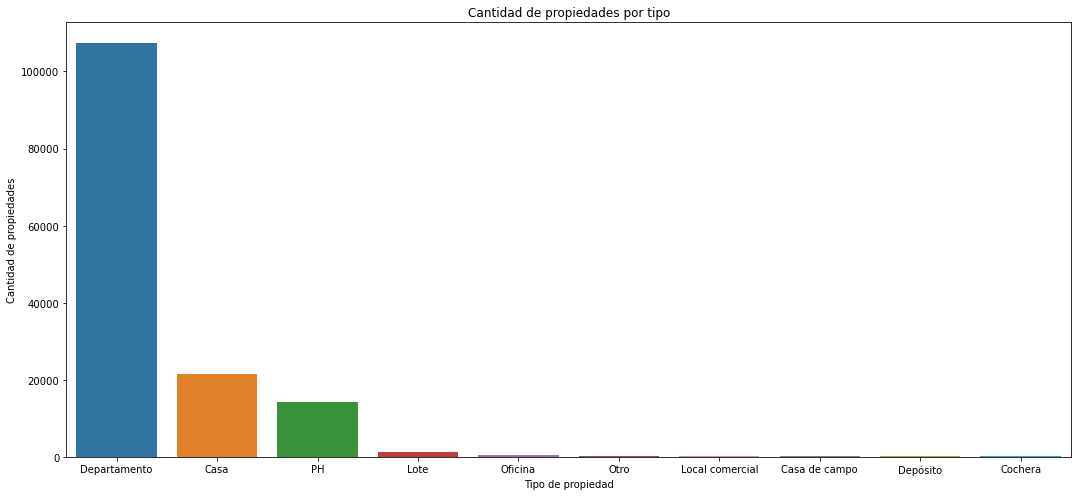

In [5]:
plt.figure(figsize=(18,8))
sns.countplot(data=propiedades,
             x='property_type',
             order = propiedades['property_type'].value_counts().index)
plt.xlabel('Tipo de propiedad')
plt.ylabel('Cantidad de propiedades')
plt.title('Cantidad de propiedades por tipo')
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

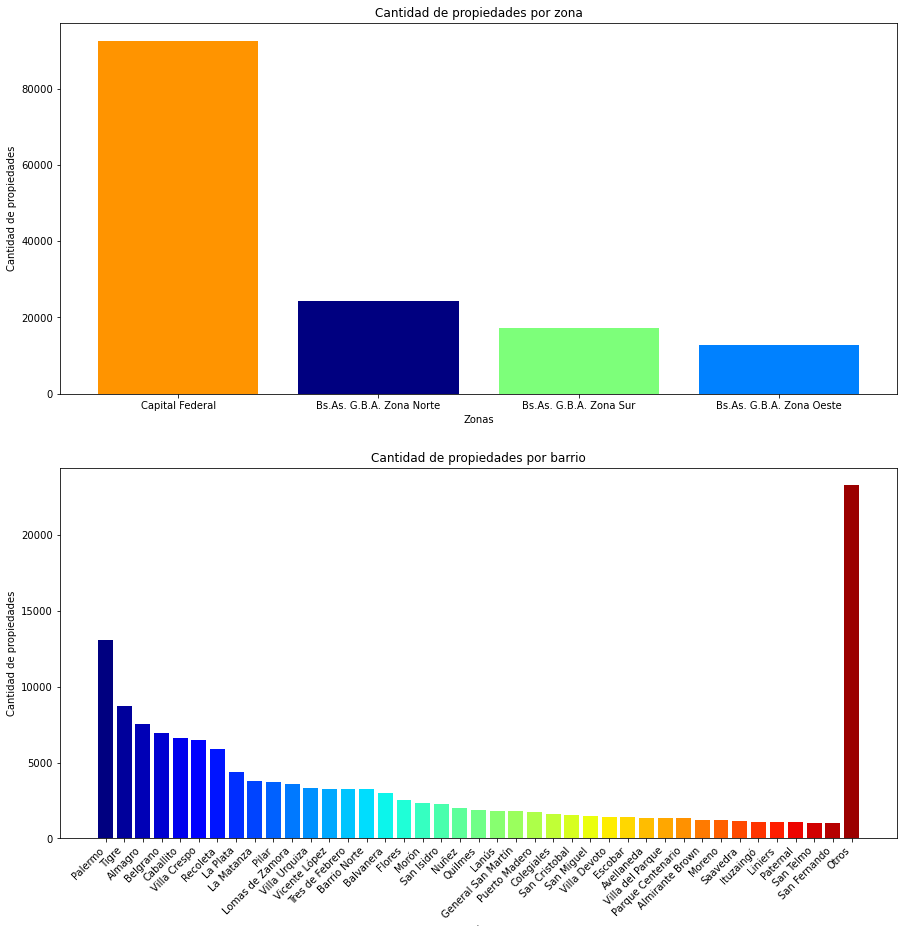

In [6]:
# Creamos algunos dataframes para facilitar graficar

# Agrupamos las zonas y contamos cuantas propiedades existen
df_l2 = pd.DataFrame(propiedades.groupby('l2').size()).reset_index().sort_values(by=0, ascending=False)

# Agrupamos los barrios y contamos cuantas propiedades existen
df_l3 = pd.DataFrame(propiedades.groupby('l3').size()).reset_index().sort_values(by=0, ascending=False)
# Como existen demasiados para graficarlos, tomamos los n primerios y al resto los agrupamos en otros
df_l3['l3'].iloc[40:] = 'Otros'
df_l3 = pd.DataFrame(df_l3.groupby('l3').sum()).reset_index().sort_values(by=0, ascending=False)
df_l3_tmp = df_l3[df_l3['l3']=='Otros']
df_l3 = df_l3[df_l3['l3'] !='Otros']
df_l3 = pd.concat([df_l3,df_l3_tmp],axis=0,ignore_index=True)

my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=len(df_l2))
fig, ax = plt.subplots(2,figsize=(15,15))
ax[0].bar(df_l2['l2'], df_l2[0],color=my_cmap(my_norm(df_l2['l2'].index)))
ax[0].title.set_text('Cantidad de propiedades por zona')
ax[0].set_xlabel('Zonas')
ax[0].set_ylabel('Cantidad de propiedades')

my_norm = Normalize(vmin=0, vmax=len(df_l3))
ax[1].bar(df_l3['l3'], df_l3[0],color=my_cmap(my_norm(df_l3['l3'].index)))
ax[1].axes.xaxis.label.set_size(1)
ax[1].title.set_text('Cantidad de propiedades por barrio')
plt.xticks(rotation=45, horizontalalignment='right')
ax[1].set_xlabel('Barrio')
ax[1].set_ylabel('Cantidad de propiedades')

plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [180]:
propiedades_top_3 = propiedades[propiedades['property_type'].isin(['Departamento', 'Casa','PH']) &
                               propiedades['l2'].isin(['Capital Federal'])].copy()
propiedades_top_3.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [181]:
variables = ['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type']
propiedades_top_3 = propiedades_top_3[variables].copy()
propiedades_top_3.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


### Algunas funciones que utilizamos para realizar el análisis y manipulación de los datos

In [182]:
def descartar_registros(condicion,variable,descripcion):
    '''
    Esta función se utiliza para descartar registros del df principal
    y moverlos a un df de descartados, indicando el motivo por el cual
    fue descartado.
    parametros:
    condición: mascara que debe aplicarse al df
    variable: que varibale estamos evaluando
    descripción: texto que indique el motivo por el cual fue descartado
    retorno:
    devuelve un df con los registros descartados
    '''
    propiedades_descartadas_tmp = propiedades_top_3.loc[condicion].copy()
    propiedades_descartadas_tmp['variable'] = variable
    propiedades_descartadas_tmp['motivo'] = descripcion
    propiedades_top_3.drop(propiedades_descartadas_tmp.index, inplace=True,axis=0)

    return propiedades_descartadas_tmp

In [183]:
def analisis_variables(variable,variable_texto):
    f, axes = plt.subplots(1,2, figsize=(20, 4), sharex=True)
    sns.distplot(propiedades_top_3[variable], ax=axes[0], kde=False)
    axes[0].set(xlabel='Cantidad de '+variable_texto, ylabel='Cantidad de instancias')
    sns.boxplot(data=propiedades_top_3,x=variable,y='property_type')
    axes[1].set(xlabel='Cantidad de '+variable_texto, ylabel='Tipo de propiedad')

    plt.show()

In [184]:
propiedades_descartadas = pd.DataFrame(columns=propiedades_top_3.columns.to_list()).copy()
propiedades_descartadas['variable'] = ''
propiedades_descartadas['motivo'] = ''

### Analizamos los valores faltantes

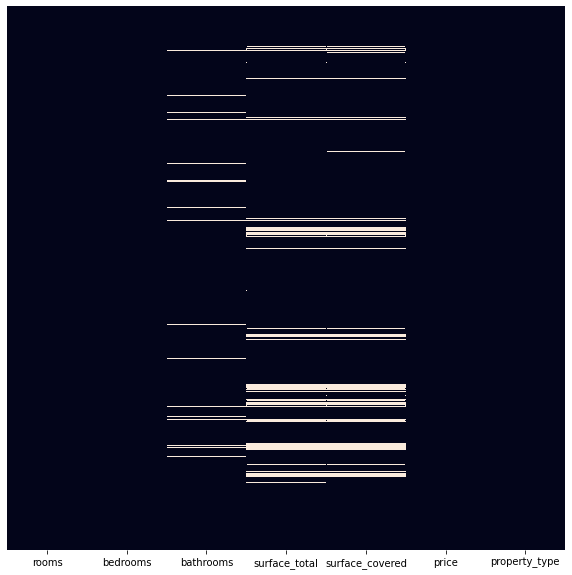

rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64

In [185]:
plt.figure(figsize=(10,10))
sns.heatmap(propiedades_top_3[variables].isnull(),cbar=False,yticklabels=False,%%cmd)
plt.show()
propiedades_top_3[variables].isnull().sum()

<div style="background-color:powderblue;">
Teniendo en cuenta que el tipo de propiedades que filtramos son: Departamento, PH y Casa, el valor de superficie cubierta (surface_coverage) deberia estar presente. Antes de quitarlos de nuestro df, vamos a analizar a que tipo de propiedad pertenecen.
</div>

In [186]:
# analizamos como impacta a cada uno de los tipos de propiedad
df_tmp = pd.concat({'Cantidad total': pd.DataFrame(propiedades_top_3.groupby('property_type').size()),
                    'Datos faltantes' : pd.concat([propiedades_top_3['property_type'],propiedades_top_3[['surface_covered']].isnull()],axis=1).groupby('property_type').sum()}
                   ,axis=1)
df_tmp

,Cantidad total,Datos faltantes
,0,surface_covered
property_type,,
Casa,2692,448
Departamento,79029,8714
PH,9764,73


In [190]:
# descartamos los registros sin superficie cubierta
condicion = propiedades_top_3.surface_covered.isna()
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(condicion,'surface_covered','Valor faltante')])
propiedades_descartadas.shape

(9235, 9)

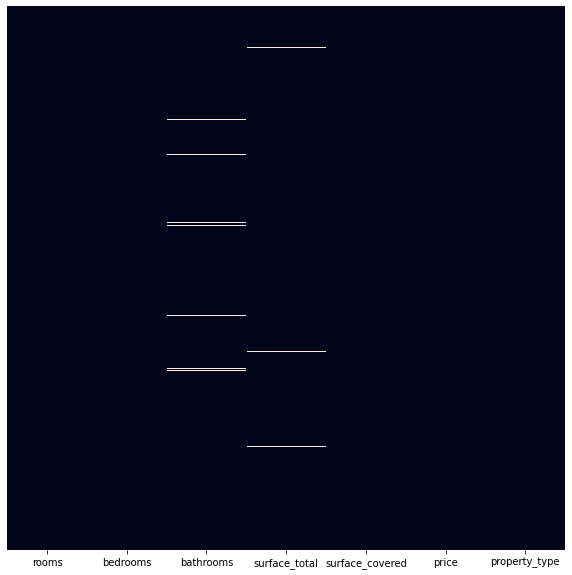

rooms                0
bedrooms             0
bathrooms          845
surface_total      199
surface_covered      0
price                0
property_type        0
dtype: int64

In [191]:
plt.figure(figsize=(10,10))
sns.heatmap(propiedades_top_3[variables].isnull(),cbar=False,yticklabels=False)
plt.show()
propiedades_top_3[variables].isnull().sum()

In [192]:
# descartamos los registros sin baños
condicion = propiedades_top_3.bathrooms.isna()
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(condicion,'bathrooms','Valor faltante')])
propiedades_descartadas.shape

(10080, 9)

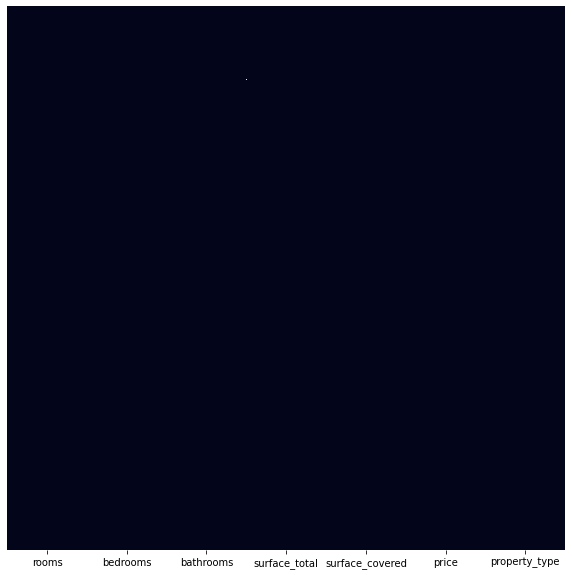

rooms                0
bedrooms             0
bathrooms            0
surface_total      195
surface_covered      0
price                0
property_type        0
dtype: int64

In [193]:
plt.figure(figsize=(10,10))
sns.heatmap(propiedades_top_3[variables].isnull(),cbar=False,yticklabels=False)
plt.show()
propiedades_top_3[variables].isnull().sum()

In [194]:
# descartamos los registros sin superficie total
condicion = propiedades_top_3.surface_total.isna()
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(condicion,'surface_total','Valor faltante')])
propiedades_descartadas.shape

(10275, 9)

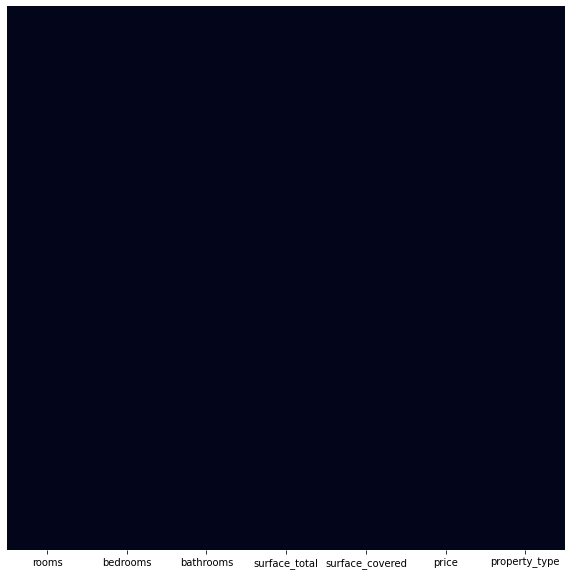

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [195]:
plt.figure(figsize=(10,10))
sns.heatmap(propiedades_top_3[variables].isnull(),cbar=False,yticklabels=False)
plt.show()
propiedades_top_3[variables].isnull().sum()

## Análisis de cada una de las variables por separado

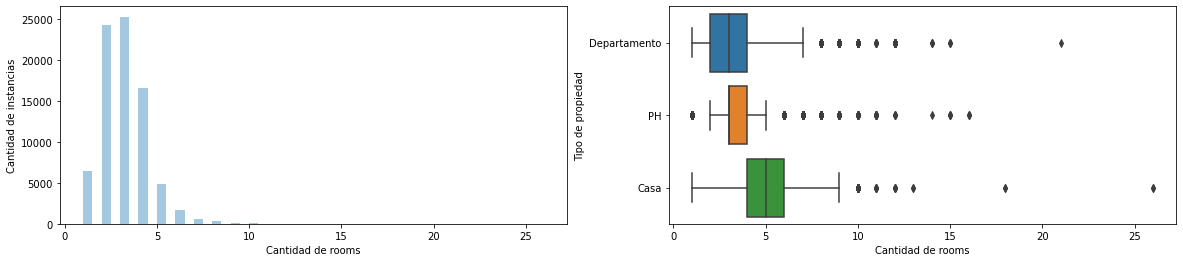

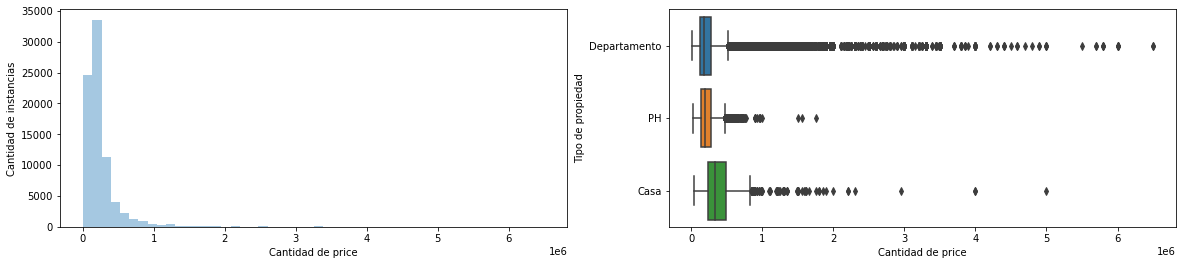

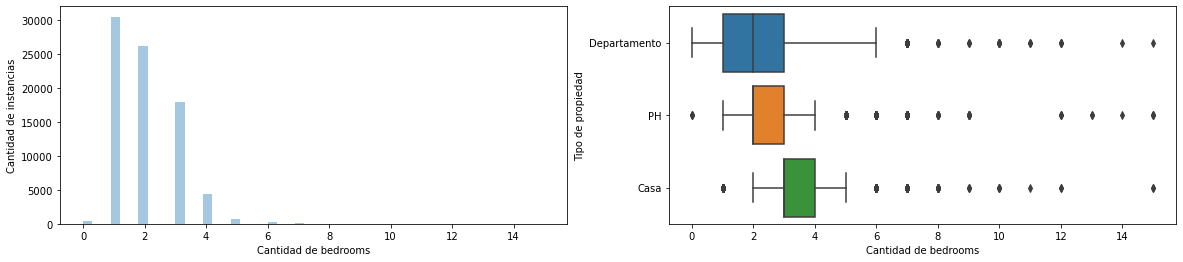

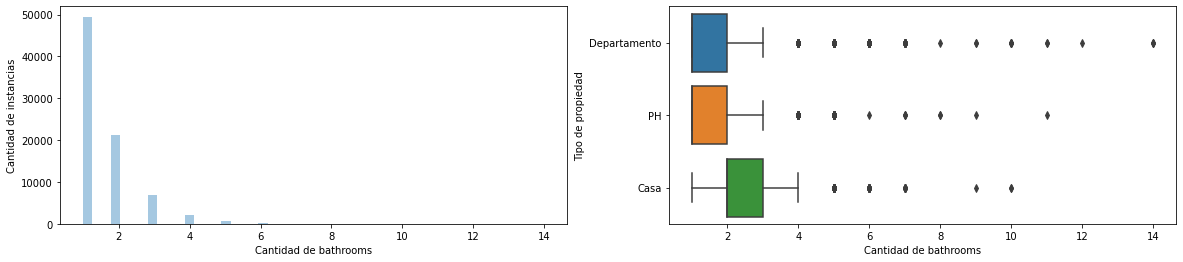

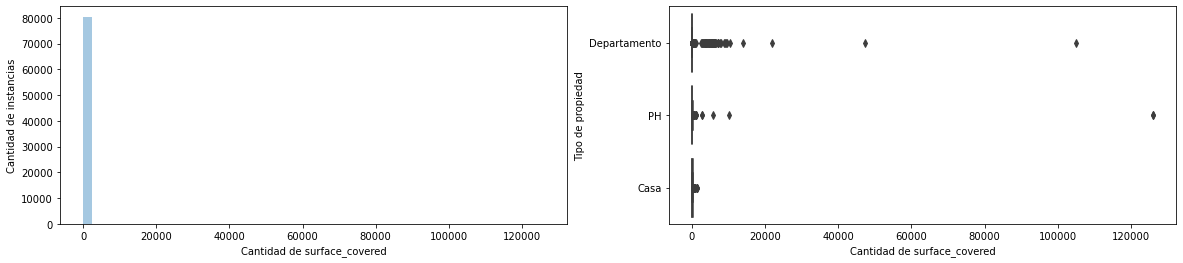

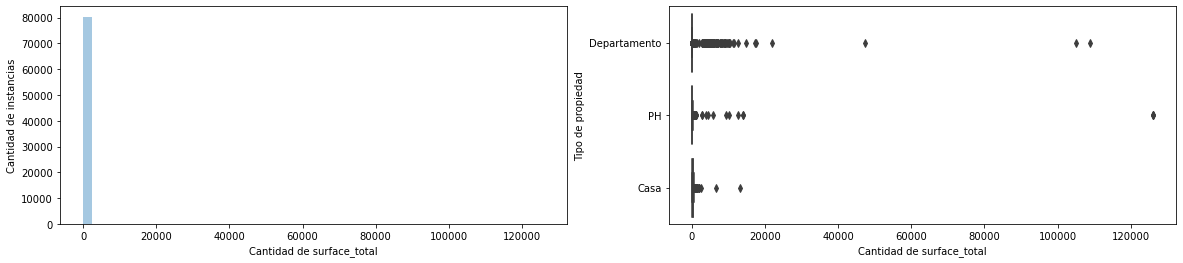

In [225]:
for v in set(variables) - {'property_type'}:
    analisis_variables(variable=v,variable_texto=v)

In [249]:
condicion = propiedades_top_3['price']>10000000
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(condicion,'price','El precio debe ser incorrecto')])

condicion = propiedades_top_3['surface_covered']>propiedades_top_3['surface_total']
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(condicion,'surface_covered','Superficie cubierta superior a superficie total')])


condicion = propiedades_top_3['surface_total']>40000
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(condicion,'surface_total','Superficie total > 40000')])

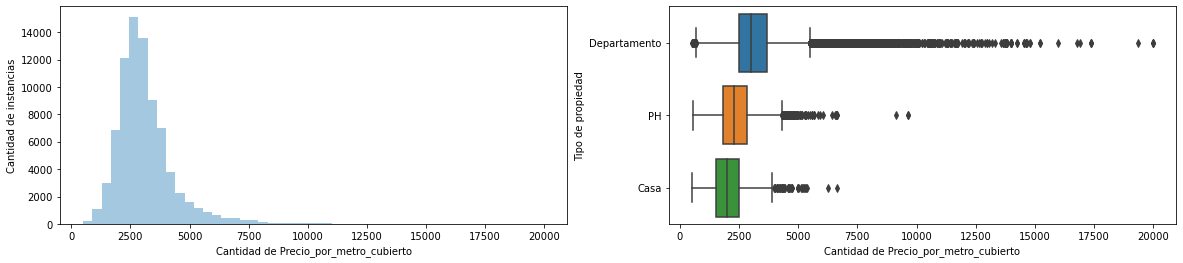

In [250]:
propiedades_top_3['Precio_por_metro_cubierto'] = propiedades_top_3['price'] / propiedades_top_3['surface_covered']

analisis_variables(variable='Precio_por_metro_cubierto',variable_texto='Precio_por_metro_cubierto')

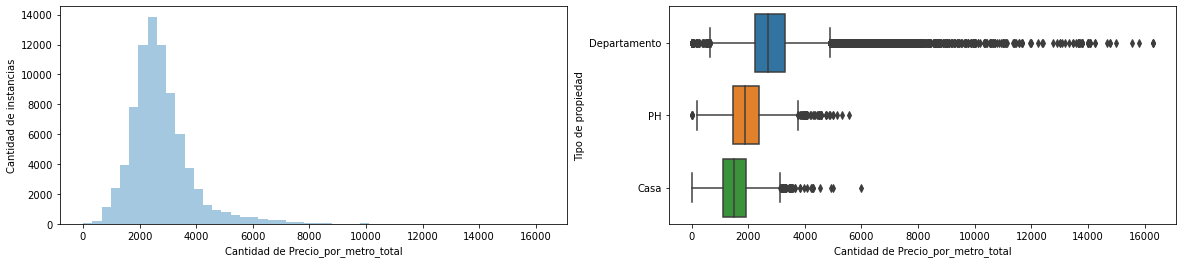

In [251]:
propiedades_top_3['Precio_por_metro_total'] = propiedades_top_3['price'] / propiedades_top_3['surface_total']

analisis_variables(variable='Precio_por_metro_total',variable_texto='Precio_por_metro_total')

In [252]:
condicion = propiedades_top_3['Precio_por_metro_cubierto'] > 20000
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(condicion,'price','Precio por metro cubierto elevado')])

condicion = propiedades_top_3['Precio_por_metro_cubierto'] < 500
propiedades_descartadas = pd.concat([propiedades_descartadas, descartar_registros(condicion,'price','Precio por metro cubierto bajo')])



In [255]:
propiedades_top_3.drop('Precio_por_metro_total',inplace=True,axis=1)
propiedades_top_3.drop('Precio_por_metro_cubierto',inplace=True,axis=1)

In [256]:
propiedades_descartadas.shape

(11167, 11)

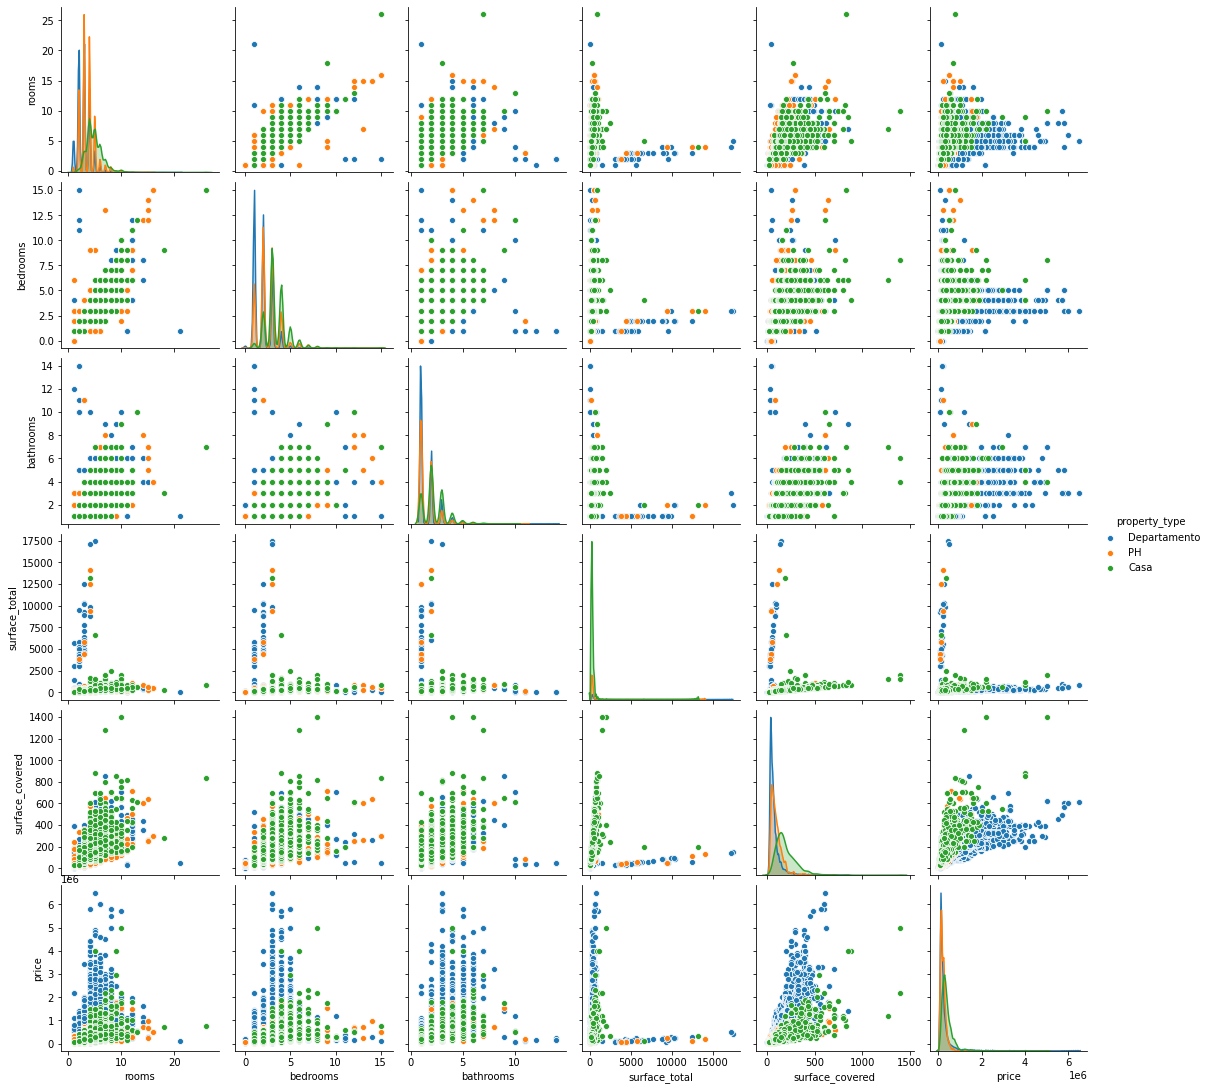

In [257]:
sns.pairplot(data=propiedades_top_3,hue='property_type')

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925033,0.601781,0.288080,0.760635,0.473666
bedrooms,0.925033,1.000000,0.604066,0.274467,0.724887,0.432744
bathrooms,0.601781,0.604066,1.000000,0.253362,0.696071,0.625716
surface_total,0.288080,0.274467,0.253362,1.000000,0.368114,0.266245
surface_covered,0.760635,0.724887,0.696071,0.368114,1.000000,0.749300
price,0.473666,0.432744,0.625716,0.266245,0.749300,1.000000


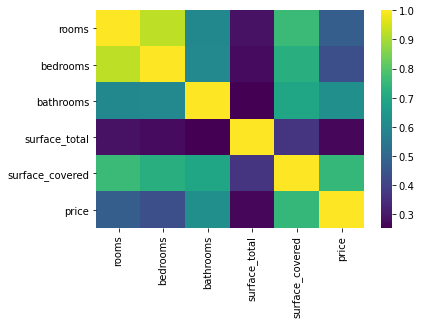

In [261]:
sns.heatmap(propiedades_top_3.corr(),cmap='viridis')
propiedades_top_3.corr()

<div style="background-color:powderblue;">
Si calculamos la correlación del todo el conjunto de los datos, podemos determinar que las variables que mas correlación con el precio son:

    

<ul>
  <li><b>Superficie cubierta:</b> con una correlación de 0.749300</li>
    <li><b>Cantidad de baños:</b> con una correlación de 0.625716</li>
    <li><b>Cantidad de habitaciones:</b> con una correlación de 0.473666</li>
    <li><b>Cantidadd de dormitorios:</b> con una correlación de 0.432744</li>
</ul> 
</div>

In [275]:
# Si lo calculamos por tipo de propiedad:
for tipo_propiedad in propiedades_top_3['property_type'].unique():
    print(tipo_propiedad)
    prop_corr = propiedades_top_3[propiedades_top_3['property_type']==tipo_propiedad].corr()
    display(prop_corr.sort_values(by='price', ascending=False))
#sns.heatmap(propiedades_top_3.corr(),cmap='viridis')
#propiedades_top_3.corr()

Departamento


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
price,0.512115,0.472815,0.646040,0.284759,0.829837,1.000000
surface_covered,0.764692,0.723588,0.725970,0.337157,1.000000,0.829837
bathrooms,0.609380,0.617171,1.000000,0.248732,0.725970,0.646040
rooms,1.000000,0.920460,0.609380,0.263371,0.764692,0.512115
bedrooms,0.920460,1.000000,0.617171,0.247008,0.723588,0.472815
surface_total,0.263371,0.247008,0.248732,1.000000,0.337157,0.284759


PH


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
price,0.583769,0.570934,0.579115,0.250230,0.755795,1.000000
surface_covered,0.704665,0.693392,0.597907,0.316153,1.000000,0.755795
rooms,1.000000,0.928113,0.574464,0.236596,0.704665,0.583769
bathrooms,0.574464,0.568362,1.000000,0.193500,0.597907,0.579115
bedrooms,0.928113,1.000000,0.568362,0.232740,0.693392,0.570934
surface_total,0.236596,0.232740,0.193500,1.000000,0.316153,0.250230


Casa


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
price,0.413498,0.365084,0.521528,0.282713,0.704272,1.000000
surface_covered,0.582195,0.562675,0.604793,0.381799,1.000000,0.704272
bathrooms,0.542733,0.568636,1.000000,0.234830,0.604793,0.521528
rooms,1.000000,0.851879,0.542733,0.213148,0.582195,0.413498
bedrooms,0.851879,1.000000,0.568636,0.207787,0.562675,0.365084
surface_total,0.213148,0.207787,0.234830,1.000000,0.381799,0.282713


<div style="background-color:powderblue;">
Si obvervaciones la correlación por tipo de propiedad vemos:
</div>   

|Departamento||PH||Casa||
|----|---|---|--|--|--|
|surface_covered|0.829837|surface_covered|0.755795|surface_covered|0.704272|
|bathrooms|0.646040|rooms|0.583769|bathrooms|0.521528|
|rooms|0.512115|bathrooms|0.579115|rooms|0.413498|
|bedrooms|0.472815|bedrooms|0.570934|bedrooms|0.365084|
|surface_total|0.284759|surface_total|0.250230|surface_total|0.282713|


### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


<div style="background-color:powderblue;">
Pregunta planteada: como varía el valor por metro de construccion por metro cuadrado cubierto de acuerdo al tipo de propiedad?
</div>   


In [284]:
df_tmp = propiedades_top_3[['property_type','price','surface_covered']].groupby('property_type').sum()
df_tmp['precio_por_metro_cubierto'] = df_tmp['price'] / df_tmp['surface_covered']
df_tmp[['precio_por_metro_cubierto']].sort_values(by='precio_por_metro_cubierto',  ascending=False)

,precio_por_metro_cubierto
property_type,
Departamento,3516.691937
PH,2200.993365
Casa,1975.204798


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [365]:
# armamos nuestro ds, de acuerdo a lo solicitado en el enunciado
propiedades_final = propiedades[propiedades['property_type'].isin(['Departamento', 'Casa','PH']) &
                               propiedades['l2'].isin(['Capital Federal'])].copy()
propiedades_final = propiedades_final[ (propiedades_final['surface_total'] >= 15) & (propiedades_final['surface_total'] <= 1000) ]
propiedades_final = propiedades_final[propiedades_final['price'] <= 4000000]
propiedades_final = propiedades_final[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
propiedades_final.dropna(inplace=True)
propiedades_final.shape

(81019, 6)

# Modelo KNN

### Creamos y entrenamos el modelo

In [298]:
from sklearn.model_selection import train_test_split

In [366]:
propiedades_final.columns.to_list()

['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']

In [367]:
# Separamos en variables predictoras (X) y la variable objetivo (y)
X = propiedades_final[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y = propiedades_final['price']

In [368]:
# Separamos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1975)

In [302]:
# Creamos y entrenamos nuestro modelo benchmark
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [306]:
# Predecimos
y_pred_train = knn_regressor.predict(X_train)
y_pred_test = knn_regressor.predict(X_test)

In [307]:
# calculamos el error
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 123642.32559632398
Raíz del error cuadrático medio en Test: 148302.62956987502


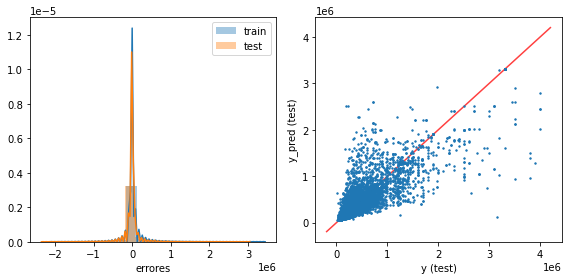

In [353]:
# Graficamos
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_pred_train, bins = 20, label = 'train')
sns.distplot(y_test - y_pred_test, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_pred_test, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [349]:
resultados = []
for n_vecinos in range(1,16):
    knn_regressor = KNeighborsRegressor(n_neighbors=n_vecinos)
    knn_regressor.fit(X_train, y_train)
    y_pred_train = knn_regressor.predict(X_train)
    y_pred_test = knn_regressor.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    resultados.append([n_vecinos,rmse_train,rmse_test])
    

In [350]:
resultados = pd.DataFrame(resultados)
resultados.rename({0:'Nro. de vecinos',1:'rmse_train',2:'rmse_test'},axis=1,inplace=True)
resultados.sort_values(by='rmse_test').reset_index()

,index,Nro. de vecinos,rmse_train,rmse_test
0,2,3,105543.652449,146325.543214
1,3,4,116524.560926,146692.176683
2,1,2,93818.564703,147201.284448
3,4,5,123642.325596,148302.629570
4,5,6,129964.518788,149616.694664
5,0,1,75418.203827,150314.431498
6,6,7,134429.515122,151035.151413
7,7,8,138460.970047,152772.889761
8,8,9,141784.806882,154313.068506
9,9,10,144598.063408,155812.867027


In [351]:
resultados = []
metricas = ['euclidean','manhattan','chebyshev','minkowski']
for n_vecinos in range(1,16):
    for metrica in metricas:
        knn_regressor = KNeighborsRegressor(n_neighbors=n_vecinos,metric=metrica)
        knn_regressor.fit(X_train, y_train)
        y_pred_train = knn_regressor.predict(X_train)
        y_pred_test = knn_regressor.predict(X_test)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        resultados.append([metrica,n_vecinos,rmse_train,rmse_test])
    

In [354]:
resultados = pd.DataFrame(resultados)
resultados.rename({0:'Metrica',1:'Nro. de vecinos',2:'rmse_train',3:'rmse_test'},axis=1,inplace=True)
resultados.sort_values(by='rmse_test').reset_index().head(10)

,index,Metrica,Nro. de vecinos,rmse_train,rmse_test
0,13,manhattan,4,116163.109151,144818.301702
1,9,manhattan,3,105584.622659,145112.915743
2,11,minkowski,3,105543.652449,146325.543214
3,8,euclidean,3,105543.652449,146325.543214
4,17,manhattan,5,123531.231028,146359.246182
5,12,euclidean,4,116524.560926,146692.176683
6,15,minkowski,4,116524.560926,146692.176683
7,21,manhattan,6,128874.392706,146835.158401
8,4,euclidean,2,93818.564703,147201.284448
9,7,minkowski,2,93818.564703,147201.284448


In [369]:
knn_regressor = KNeighborsRegressor(n_neighbors=4,metric='manhattan')
knn_regressor.fit(X_train, y_train)
y_pred_train = knn_regressor.predict(X_train)
y_pred_test = knn_regressor.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))


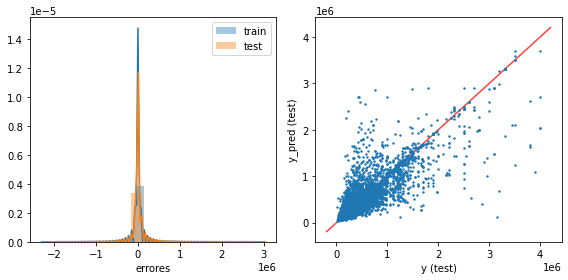

In [370]:
# Graficamos
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_pred_train, bins = 20, label = 'train')
sns.distplot(y_test - y_pred_test, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_pred_test, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [373]:
propiedades_final['price_knn_pred'] = knn_regressor.predict(X)
propiedades_final.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,price_knn_pred
0,7.0,7.0,2.0,140.0,140.0,153000.0,164000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0,170850.0
2,2.0,1.0,1.0,45.0,45.0,125000.0,130750.0
3,2.0,1.0,1.0,85.0,50.0,295000.0,238500.0
5,2.0,1.0,1.0,56.0,56.0,150000.0,162000.0


# Modelo DecisionTreeRegressor

In [374]:
from sklearn.tree import DecisionTreeRegressor

In [375]:
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

In [376]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [377]:
# Predecimos
y_pred_train = knn_regressor.predict(X_train)
y_pred_test = knn_regressor.predict(X_test)

In [378]:
# calculamos el error
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 116163.1091505207
Raíz del error cuadrático medio en Test: 144818.30170216263


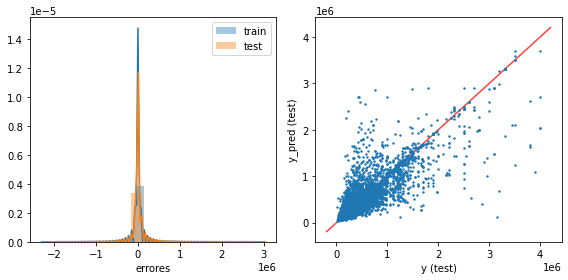

In [380]:
# Graficamos
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_pred_train, bins = 20, label = 'train')
sns.distplot(y_test - y_pred_test, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_pred_test, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [ ]:
for profundidad in range(1,16):
    tree_regressor = DecisionTreeRegressor(profundidad=3, random_state=42)
    tree_regressor.fit(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))